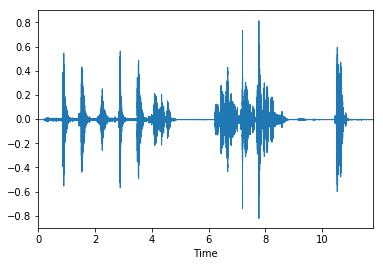

In [3]:
import librosa
import librosa.display
import IPython.display as ipd
y,sr=librosa.load('Test.wav',sr=44100)
librosa.display.waveplot(y, sr=sr)

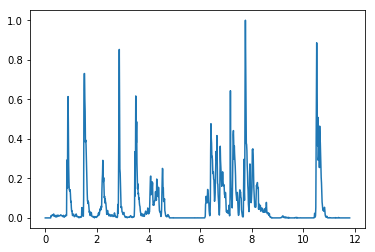

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
win_size=512
hop_size=512
rms=librosa.feature.rms(y=y,frame_length=win_size,hop_length=hop_size)[0]
rms=rms/max(rms)
t=np.arange(rms.size)*hop_size/sr
plt.plot(t,rms)
plt.show()

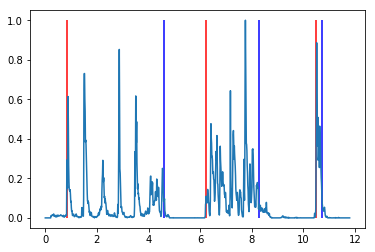

In [5]:
status='Silence'
endpoint=[]
start=0
end=0
space_time=1
space_frames=int(space_time*sr/hop_size)
space_count=0
intervals=np.empty(shape=[0,2])

for i in range(rms.size):
    if status=='Silence':
        if rms[i]>=0.1:
            start=i-1
            status='Speaking'
            space_count=0
    if status=='Speaking':
        if rms[i]<0.1:
            space_count=space_count+1
        if rms[i]>=0.1:
            space_count=0
        if space_count>=space_frames:
            end=i-space_frames+1
            endpoint.append((start,end))
            status='Silence'
            space_count=0
            intervals=np.append(intervals,
                      [[start*hop_size/sr,end*hop_size/sr]],axis=0)

librosa.output.annotation('edges.csv',intervals)
            
plt.plot(t,rms)
for start,end in endpoint:
    plt.vlines(start*hop_size/sr,0,1,colors='red')
    plt.vlines(end*hop_size/sr,0,1,colors='blue')
plt.show()

In [6]:
for start,end in endpoint:
    y1=y[start*hop_size:end*hop_size]
    ipd.display(ipd.Audio(y1,rate=sr))